<a href="https://colab.research.google.com/github/Bayrkdartech/My-colab-project/blob/main/Practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: diabetes.csv            
Glucose:17قيمة غير منطقية (0) 
BloodPressure:3قيمة غير منطقية (0) 
SkinThickness:0قيمة غير منطقية (0) 
Insulin:7قيمة غير منطقية (0) 
BMI:0قيمة غير منطقية (0) 
///////////////////////////////////
Glucoseيحتوي على 0 قيم = 0
BloodPressureيحتوي على 0 قيم = 0
SkinThicknessيحتوي على 0 قيم = 0
Insulinيحتوي على 0 قيم = 0


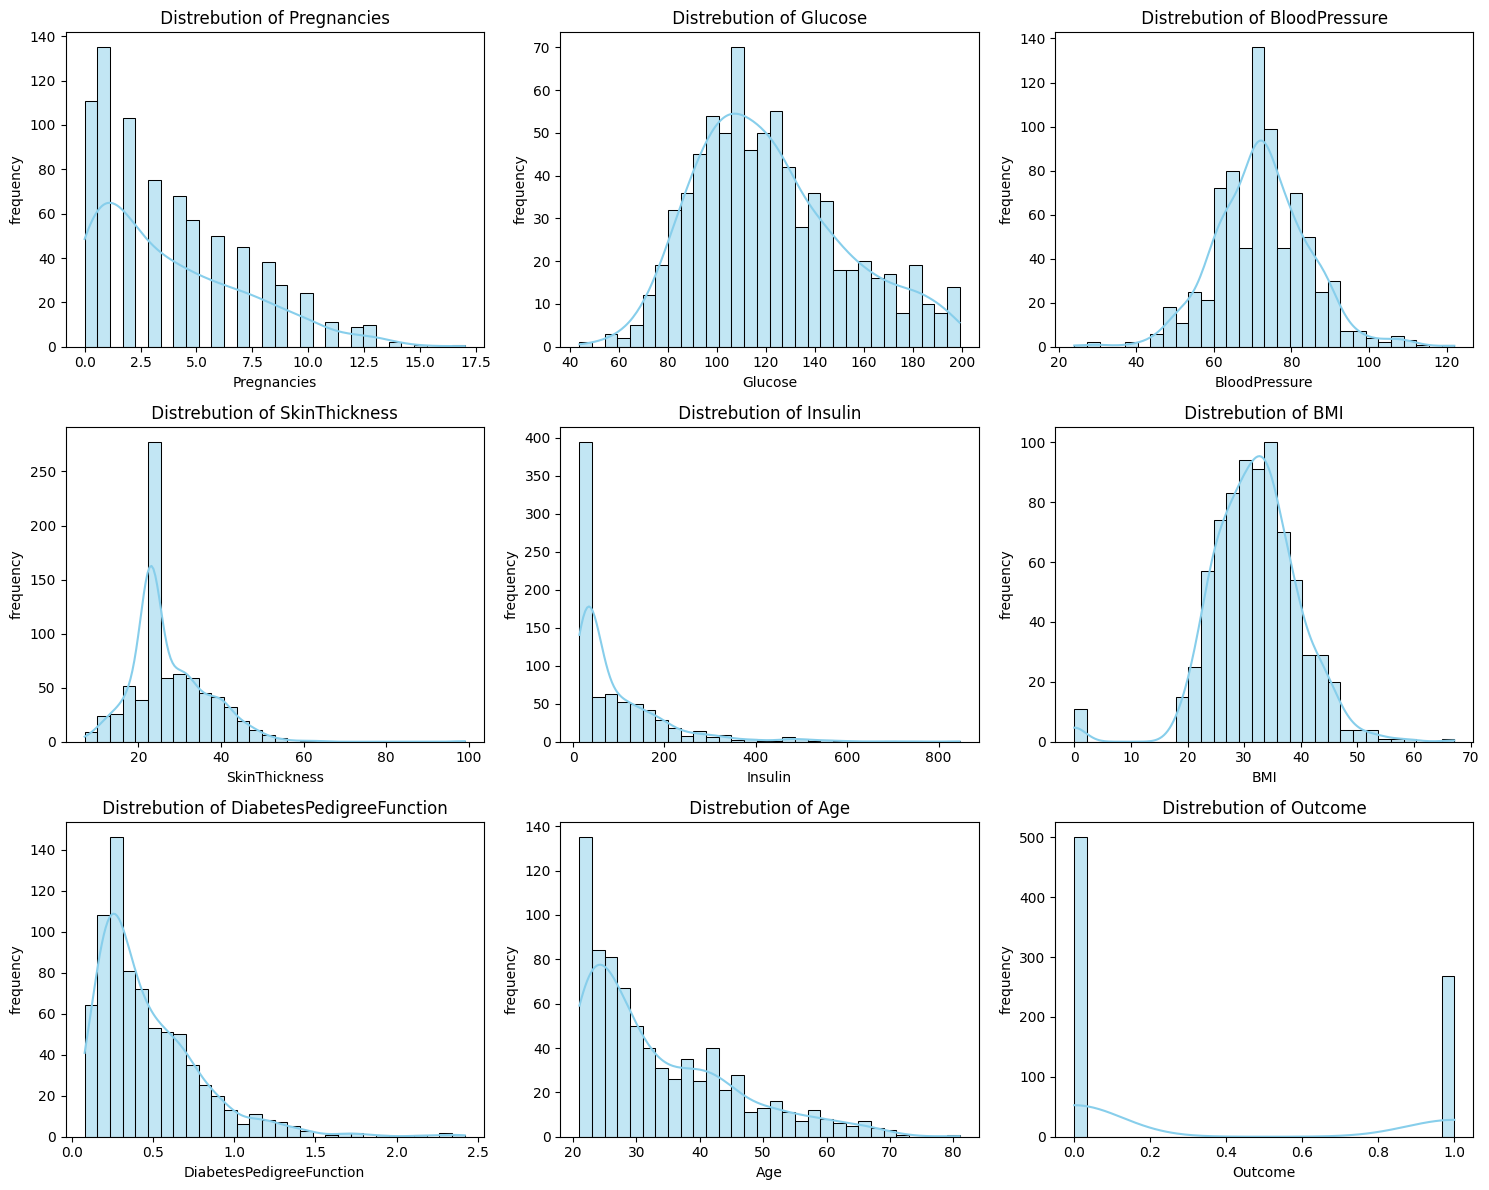

<Figure size 1500x1200 with 0 Axes>

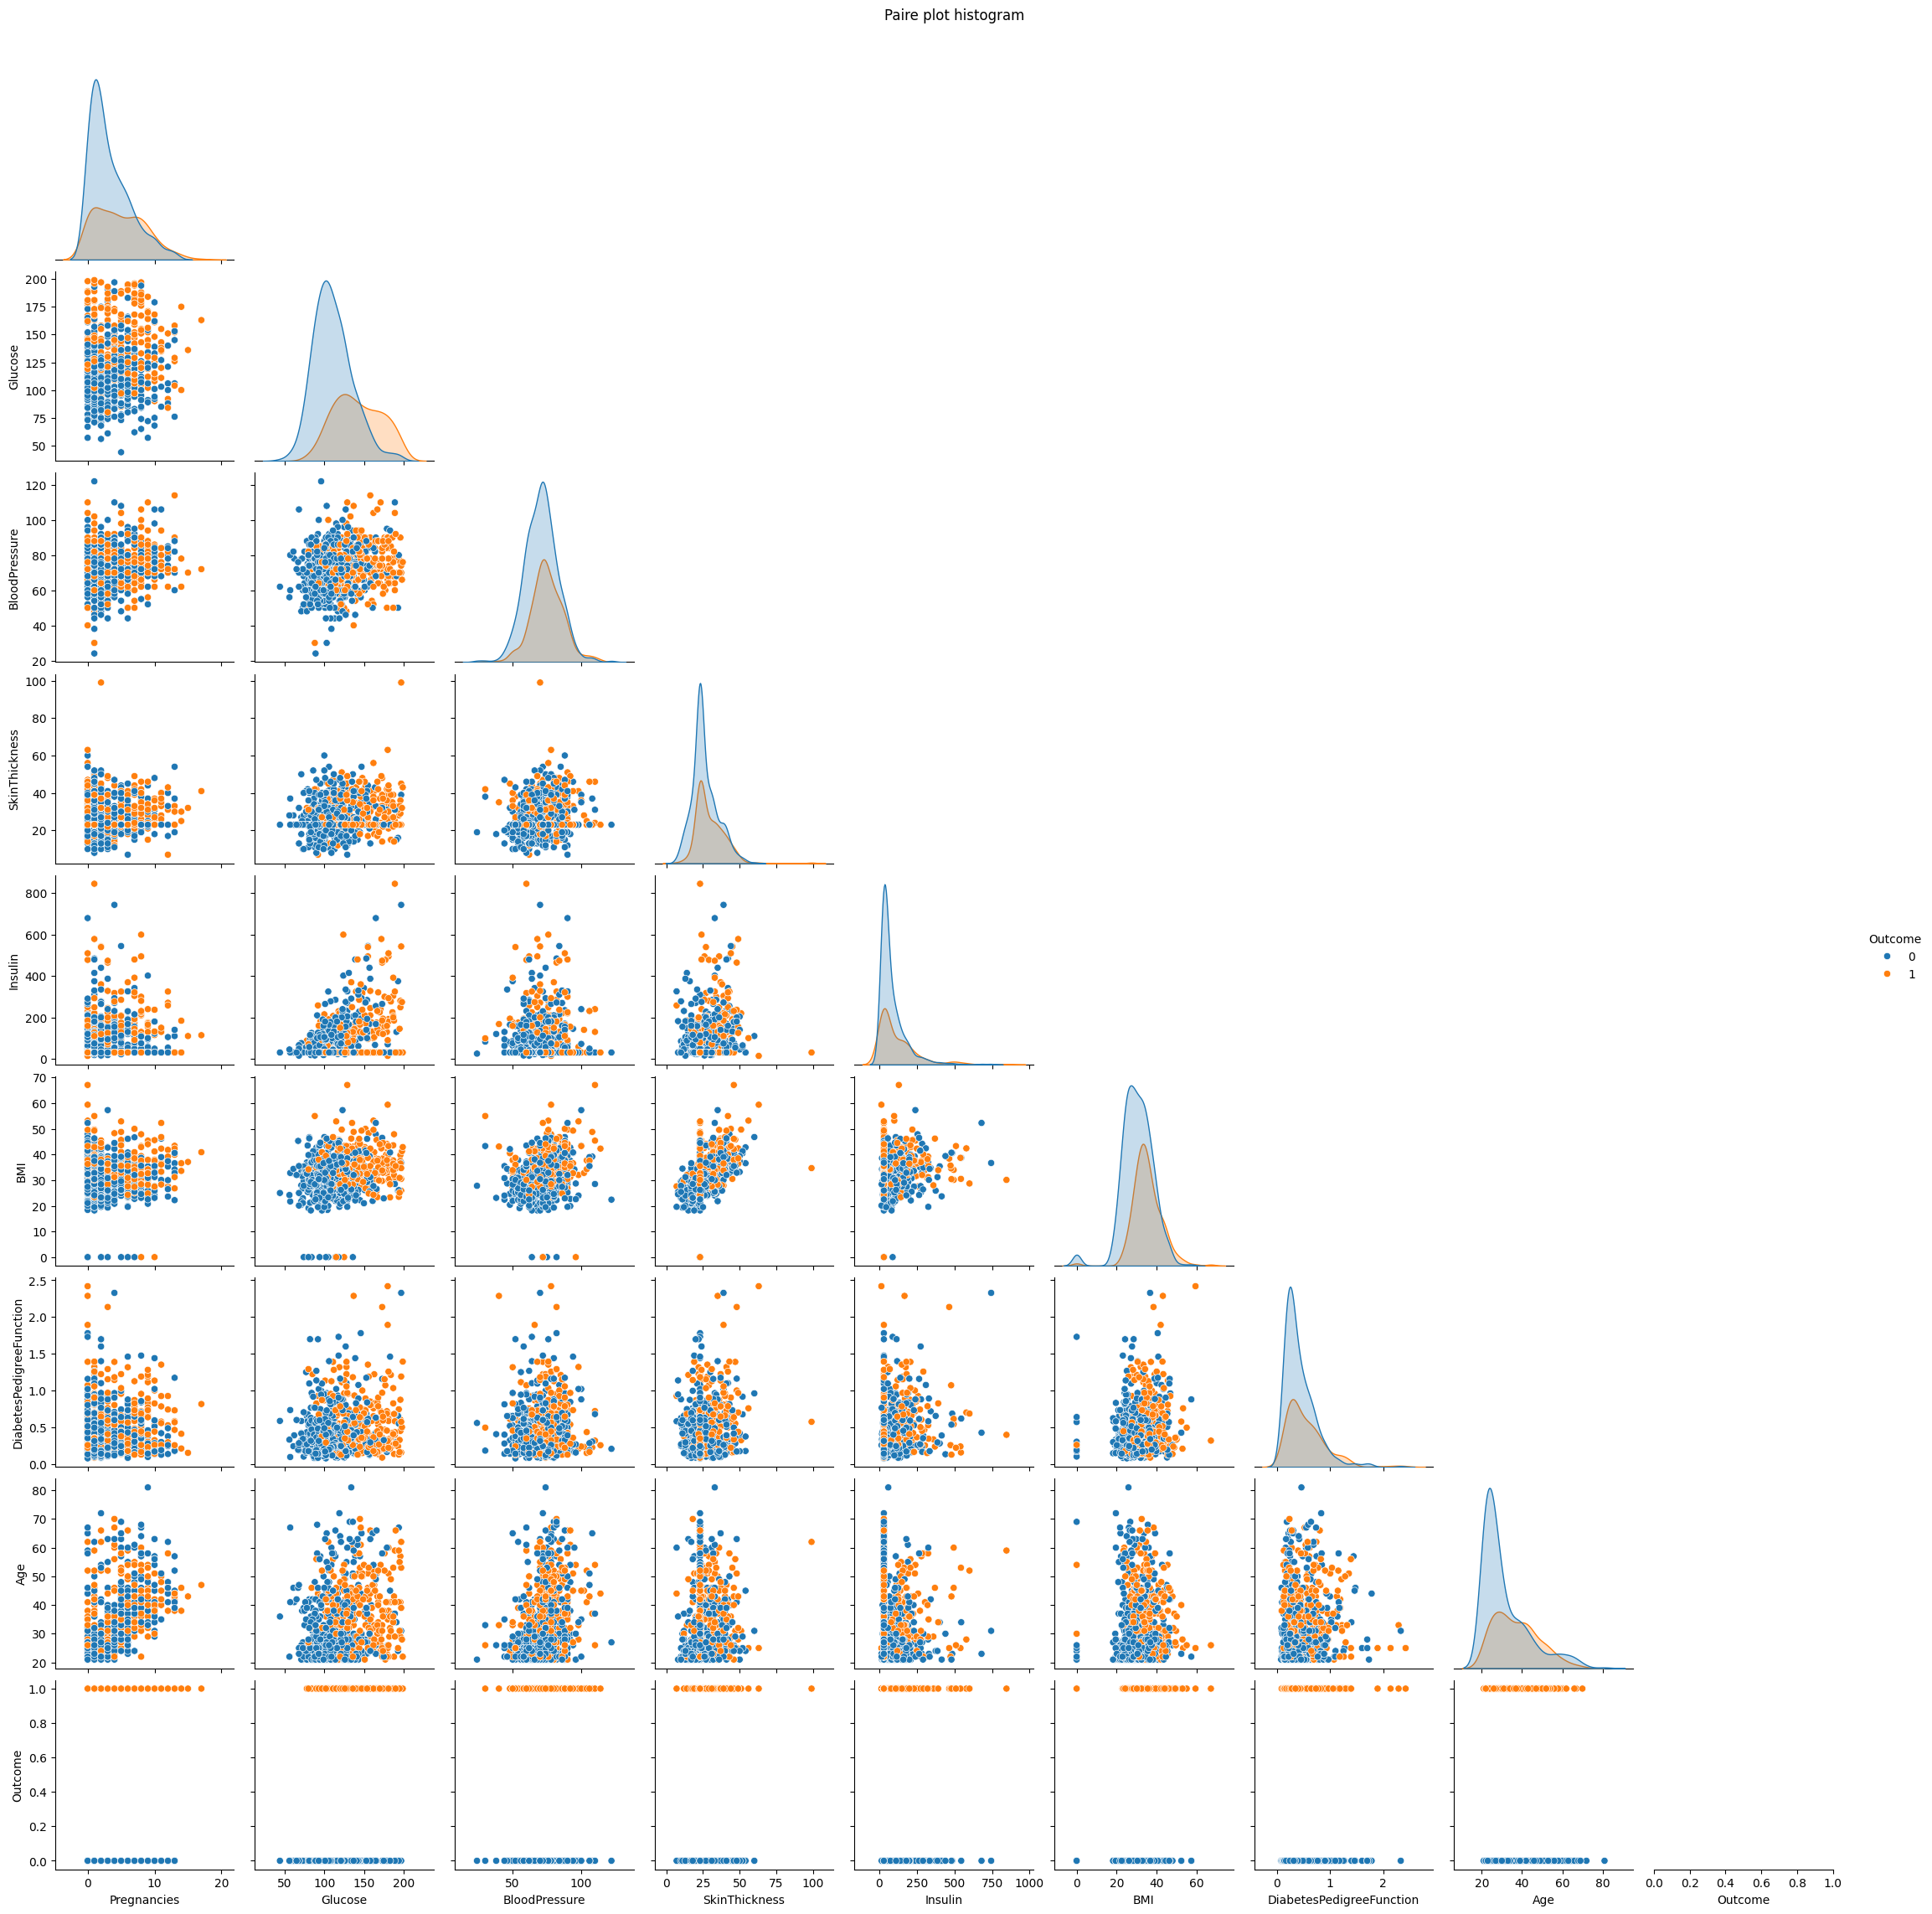

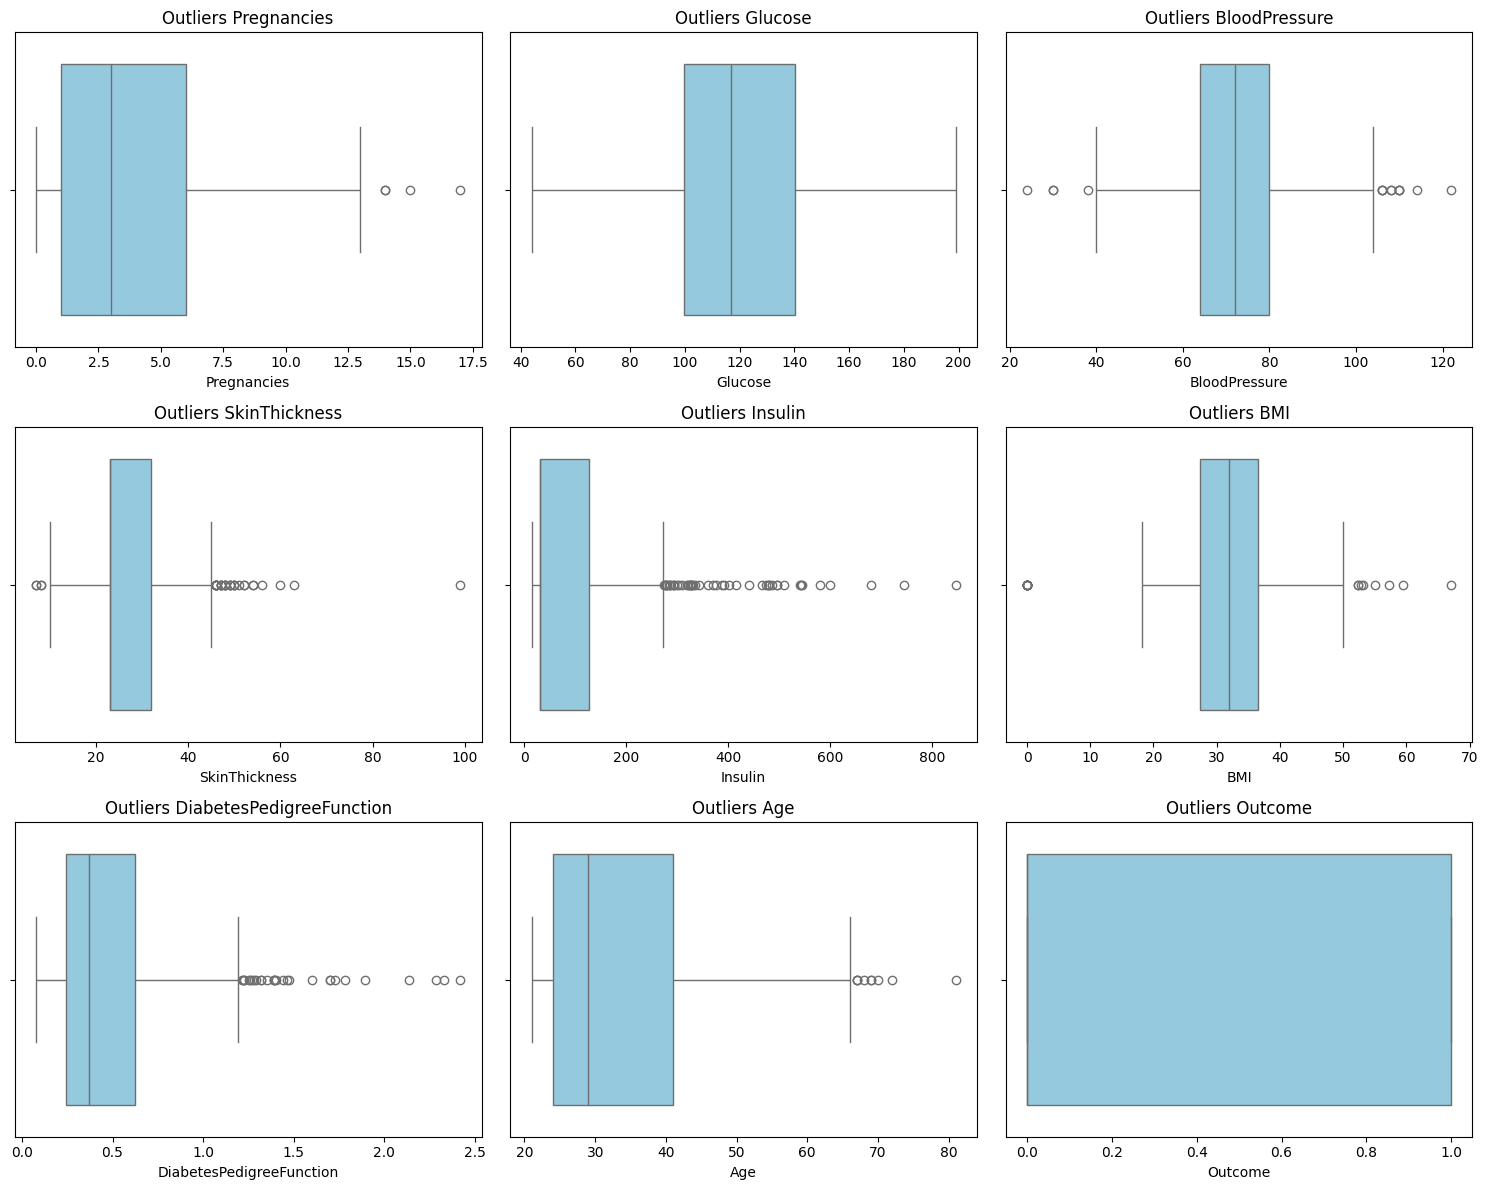

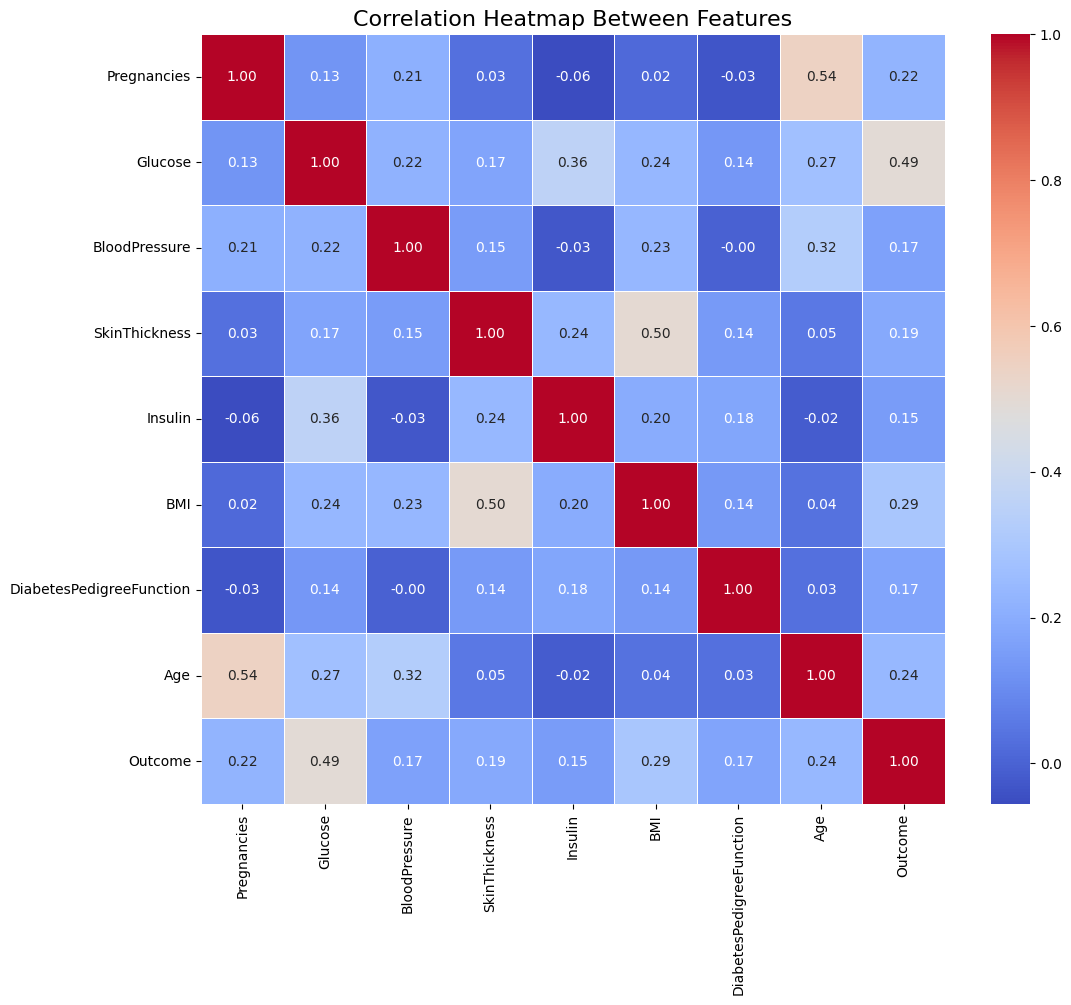

T-staticst:15.673795182294105, p-value:3.1287190418423694e-48
ا يوجد فرق


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from google.colab import drive
drive.mount('/content/drive')



import os
os.makedirs('/root/.kaggle', exist_ok=True)
import shutil
shutil.copy('/content/drive/MyDrive/kaggle.json', '/root/.kaggle/kaggle.json')

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

import pandas as pd
df= pd.read_csv('diabetes.csv')
df.head()



cols_with_invalid_zero=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_invalid_zero:

   count= (df[col] == 100).sum()
   print(f'{col}:{count}قيمة غير منطقية (0) ')

print("///////////////////////////////////")

cols_with_invalid_zero=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for col in cols_with_invalid_zero:
    median=df[col].median()
    df[col]=df[col].replace(0, median)
for col in cols_with_invalid_zero:
    print(f"{col}يحتوي على {(df[col]==0).sum()} قيم = 0")




cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


plt.figure(figsize=(15,12))
for i, col in enumerate(cols):
      plt.subplot(3,3,i+1)
      sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue' )
      plt.title(f' Distrebution of {col} ')
      plt.xlabel(col)
      plt.ylabel("frequency")

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,12))
sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',

        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], hue='Outcome', corner= True)
plt.suptitle("Paire plot histogram ", y=1.02)

plt.show()

plt.figure(figsize=(15,12))
for i, col in enumerate(cols):
     plt.subplot(3,3,i+1)
     sns.boxplot(x=df[col],color='skyblue')
     plt.title(f'Outliers {col}')
     plt.xlabel(col)

plt.tight_layout()
plt.show



corr_matrix = df.corr()

plt.figure(figsize=(12, 10))  # حجم الشكل
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap Between Features", fontsize=16)
plt.show()

group_diabetic= df[df['Outcome']==1]['Glucose']
group_nondiabetic= df[df['Outcome']==0]['Glucose']

t_stat, p_value= ttest_ind(group_diabetic,group_nondiabetic, equal_var=True)
print(f"T-staticst:{t_stat}, p-value:{p_value}")

if p_value< 0.05:
   print("ا يوجد فرق")
else:
   print("لا يوجد فرق")

from google.colab import drive
dribe.mount('/content/drive')